## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Import necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import data into dataframe

In [98]:
basic_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\imdb.title.basics.csv.gz')
rating_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\imdb.title.ratings.csv.gz')
gross_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\bom.movie_gross.csv.gz')
tn_budget_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\tn.movie_budgets.csv.gz')
rt_movies_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\rt.movie_info.tsv.gz', sep="\t")
# rt_ratings_df = pd.read_csv(r'C:\Users\Sylvia\moringa_labs\project1\dsc_project\zippedData\rt.reviews.tsv.gz', sep="\t")

Overview of the datasets

In [99]:
basic_df.info()
basic_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Check for duplicates

In [100]:
basic_df.duplicated().value_counts()

False    146144
dtype: int64

Clean basic_df. Drop original_title, it is repetitive and renaming primary_title to movie_title for clarity.

In [101]:
basic_df.drop(columns=['original_title'], inplace=True)
basic_df.rename({'primary_title':'movie_title'}, axis=1, inplace=True)
basic_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


Check %age of Nans to handle missing values


In [102]:
basic_df.isna().sum()*100/len(basic_df)


tconst              0.000000
movie_title         0.000000
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

We have 23% Nan values. Let's fill it with mode. Then change runtime to int type

In [103]:
basic_df['runtime_minutes'].mode()
basic_df['runtime_minutes'].fillna(90, inplace=True)
basic_df['runtime_minutes'] = basic_df['runtime_minutes'].astype(int)
# basic_df = basic_df({'runtime_minutes'}).astype(int)
basic_df.head(5)

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,2018,90,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80,"Comedy,Drama,Fantasy"


Splitting to find the dominant genre of the movies for categorical visualization.

In [104]:
basic_df['genres'] = basic_df['genres'].str.split(',', expand=True)
basic_df['genres'].fillna('Unknown', inplace=True)
basic_df.info()
basic_df.head()
basic_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tconst           146144 non-null  object
 1   movie_title      146144 non-null  object
 2   start_year       146144 non-null  int64 
 3   runtime_minutes  146144 non-null  int32 
 4   genres           146144 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 5.0+ MB


,start_year,runtime_minutes
count,146144.000000,146144.000000
mean,2014.621798,87.015286
std,2.733583,147.199664
min,2010.000000,1.000000
25%,2012.000000,75.000000
50%,2015.000000,90.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


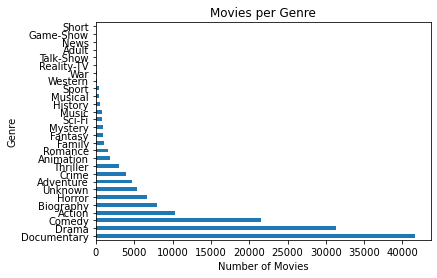

In [105]:
genre_counts = basic_df['genres'].value_counts()
genre_counts.plot(kind='barh')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Movies per Genre")
plt.show()



Overview of gross_df

In [106]:
gross_df.info()
gross_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


Change foreign_gross to float to perform math operations

In [107]:
gross_df['foreign_gross'] = pd.to_numeric(gross_df['foreign_gross'].str.replace(',', '', regex=True))
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [108]:
gross_df.isnull().sum()/len(gross_df)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

Create domestic_gross_df by dropping foreign. Fill Nan Studios with unknown and drop Nan for gross. Let's have a clean df to analyze domestic gross on.

In [109]:

domestic_gross_df = gross_df.drop(columns='foreign_gross')
domestic_gross_df['studio'].fillna('Unknown', inplace=True)

domestic_gross_df.dropna(inplace=True,subset=['domestic_gross'])
domestic_gross_df.reset_index(drop=True, inplace=True)
domestic_gross_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   studio          3359 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 105.1+ KB


Find the studio local perfomance by checking how much they gross in foreign markets.

In [120]:
studio_foreign_gross = foreign_gross_df.groupby('studio')['foreign_gross'].sum()
studio_foreign_gross = studio_foreign_gross.sort_values(ascending=False)
studio_foreign_gross.head(10)


studio
BV         2.579385e+10
Fox        2.005587e+10
WB         1.866790e+10
Uni.       1.685477e+10
Sony       1.394535e+10
Par.       1.186338e+10
WB (NL)    6.339000e+09
LGF        4.482619e+09
P/DW       3.393600e+09
LG/S       3.353724e+09
Name: foreign_gross, dtype: float64

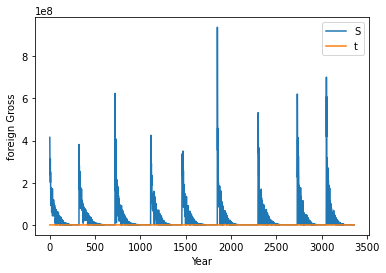

In [111]:
domestic_gross_df.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('foreign Gross')
plt.legend('Studio')


plt.show()

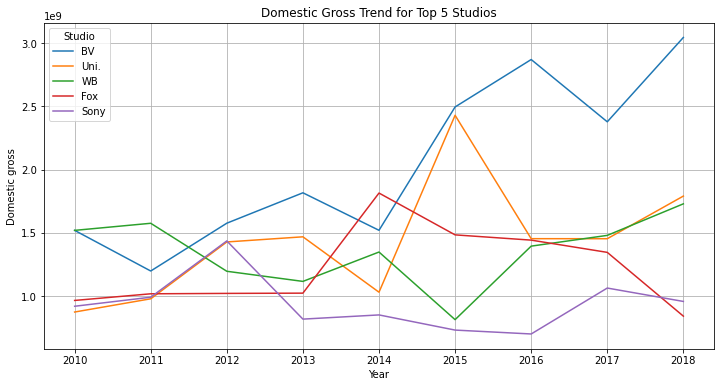

In [112]:
studio_year = domestic_gross_df.groupby(['year', 'studio'])['domestic_gross'].sum().unstack()

top_studios = domestic_gross_df.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(5).index
studio_year[top_studios].plot(figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Domestic gross')
plt.title('Domestic Gross Trend for Top 5 Studios')
plt.legend(title='Studio')
plt.grid(True)
plt.show()


Let us see the perfomance on foreign market. We repeat the same process but for foreign stats now.

In [ ]:
#drop domestic column and Nan values
foreign_gross_df = gross_df.drop(columns='domestic_gross')
foreign_gross_df['studio'].fillna('Unknown', inplace=True)

foreign_gross_df.dropna(inplace=True,subset=['foreign_gross'])
foreign_gross_df.reset_index(drop=True, inplace=True)
foreign_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          2037 non-null   object 
 1   studio         2037 non-null   object 
 2   foreign_gross  2037 non-null   float64
 3   year           2037 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 63.8+ KB


In [114]:
rating_df.info()
rating_df.head(5)
# rating_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Check for duplicates

In [115]:
rating_df.duplicated().value_counts()

False    73856
dtype: int64

In [116]:
tn_budget_df.info()
tn_budget_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [117]:
gross_df.head()
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Check for duplicates

In [118]:
tn_budget_df.duplicated().value_counts()

False    5782
dtype: int64

Create month and year columns for categorical comparison. Then drop release date

In [119]:
tn_budget_df_sorted = tn_budget_df.sort_values(by='foreign_gross', ascending=False)
tn_budget_df_sorted

KeyError: 'foreign_gross'

In [ ]:
tn_budget_df['release_month'] = tn_budget_df['release_date'].str.split(' ').str[0]
tn_budget_df['release_year'] = tn_budget_df['release_date'].str.split(' ').str[-1]
tn_budget_df = tn_budget_df.drop(columns='release_date', axis=0)


tn_budget_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Dec,2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Jun,2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Dec,2017


In [ ]:

# tn_budget_df = tn_budget_df.astype({'production_budget':'int', 'foreign_gross':'int','worldwide_gross':'int'})

tn_budget_df['foreign_gross'] = tn_budget_df['foreign_gross'].str.replace(r"[$,]", "", regex=True).astype(int)
tn_budget_df['production_budget'] = tn_budget_df['production_budget'].str.replace(r"[$,]", "", regex=True).astype(int)
# tn_budget_df['worldwide_gross'] = tn_budget_df['worldwide_gross'].str.replace(r"[$,]", "", regex=True).astype(int) # to big to execute

tn_budget_df["worldwide_gross"] = pd.to_numeric(tn_budget_df["worldwide_gross"].str.replace(r"[$,]", "", regex=True))#

tn_budget_df.info()
tn_budget_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int32 
 3   domestic_gross     5782 non-null   int32 
 4   worldwide_gross    5782 non-null   int64 
 5   release_month      5782 non-null   object
 6   release_year       5782 non-null   object
dtypes: int32(2), int64(2), object(3)
memory usage: 271.2+ KB


,id,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,Avatar,425000000,760507625,2776345279,Dec,2009
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
2,3,Dark Phoenix,350000000,42762350,149762350,Jun,2019
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017


In [ ]:
master_df = pd.merge(basic_df, rating_df, on='tconst', how='inner')
master_df = pd.merge(master_df, gross_df, how='left', left_on='movie_title', right_on='title')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73858 entries, 0 to 73857
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73858 non-null  object 
 1   movie_title      73858 non-null  object 
 2   start_year       73858 non-null  int64  
 3   runtime_minutes  73858 non-null  int32  
 4   genres           73858 non-null  object 
 5   averagerating    73858 non-null  float64
 6   numvotes         73858 non-null  int64  
 7   title            3027 non-null   object 
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   float64
 11  year             3027 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(5)
memory usage: 7.0+ MB


Don't need original_title
Clean up above before continuing

Correlations